This script was created on 28.07.2024 to build a new dataset as the old one faced the issue of having constant values. In this script we analyse the data and try to find a suitable dataset that does not face this problem. It is especially important that the root station shows real values.


In [110]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [111]:
DATAFILE = "dataset_GOM_1_A_A.pickle"
with open(f'data/datasets/type_A/{DATAFILE}', 'rb') as f:
    # load the object from the file using pickle.load()
    dataset = pickle.load(f)

In [112]:
print("stations",dataset["stations"])
print("years",dataset["years"])
print("nan_threshold",dataset["nan_threshold"])
print("features",dataset["features"])
print("add_era5",dataset["add_era5"])

stations ['42001', '42002', '42003', '42007', '42012', '42019', '42020', '42035', '42036', '42038', '42039', '42040', '42041', '42055']
years ['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
nan_threshold 0.66
features ['WDIR', 'WSPD', 'WVHT', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP']
add_era5 True


In [113]:
data = dataset["data"]
data

,WDIR_42001,WSPD_42001,PRES_42001,ATMP_42001,WTMP_42001,DEWP_42001,WDIR_42002,WSPD_42002,PRES_42002,ATMP_42002,...,WDIR_42039_ERA5,WSPD_42039_ERA5,ATMP_42039_ERA5,WSPD_42035_ERA5,WSPD_42001_ERA5,DEWP_42020_ERA5,ATMP_42019_ERA5,WTMP_42039_ERA5,WSPD_42002_ERA5,PRES_42039_ERA5
2002-01-01 00:00:00,66.0,9.3,1017.1,22.3,25.5,16.8,39.0,10.5,1016.1,21.7,...,246.007357,5.756333,13.882608,8.031200,9.867456,10.834305,11.708612,21.781113,9.820263,1019.426223
2002-01-01 01:00:00,66.0,9.3,1017.1,22.3,25.5,16.8,39.0,10.5,1016.1,21.7,...,247.678051,5.579721,14.020573,8.216895,9.782997,10.975658,11.926516,21.781113,10.465795,1019.792677
2002-01-01 02:00:00,67.0,9.4,1017.2,21.9,25.5,16.6,36.0,10.9,1016.1,21.7,...,250.591891,5.582730,14.070538,8.454808,9.517146,11.111871,12.166319,21.781113,11.760698,1019.725358
2002-01-01 03:00:00,69.0,9.1,1017.2,22.4,25.5,16.9,32.0,12.7,1015.9,20.8,...,253.468273,5.633966,14.058979,8.471692,8.911373,11.239089,12.361607,21.781113,11.910608,1019.833394
2002-01-01 04:00:00,70.0,9.0,1017.1,22.5,25.5,16.3,33.0,12.7,1015.8,21.0,...,251.493918,5.638108,13.986641,8.698506,8.481407,11.332468,12.482585,21.781113,11.716782,1019.804620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,195.0,0.5,1015.0,25.6,24.7,24.5,22.0,0.6,1015.9,25.1,...,28.180851,8.602918,22.730194,2.533178,0.601025,19.323104,21.847184,24.392457,1.062895,1016.581840
2022-12-31 20:00:00,210.0,1.0,1015.0,25.3,24.5,24.3,88.0,1.2,1015.4,24.7,...,22.969408,7.734290,22.564177,2.669909,0.979714,19.245361,22.052563,24.392457,1.330008,1016.363260
2022-12-31 21:00:00,231.0,0.6,1014.7,26.4,24.7,24.4,87.0,1.7,1014.9,24.6,...,14.655430,6.485218,22.377552,3.147255,2.067327,19.338348,22.260412,24.392457,1.770915,1016.186435
2022-12-31 22:00:00,18.0,0.7,1014.9,25.4,24.7,24.1,90.0,2.5,1014.9,24.5,...,20.371840,3.294807,24.068445,3.469271,1.554299,18.567779,22.101541,24.885927,2.483432,1017.067575


In [115]:
#filtered_df = data.loc[:, data.columns.str.contains("42012")]
#filtered_df

In [116]:
data = data.loc[data.index >= '2020-01-01']
data

,WDIR_42001,WSPD_42001,PRES_42001,ATMP_42001,WTMP_42001,DEWP_42001,WDIR_42002,WSPD_42002,PRES_42002,ATMP_42002,...,WDIR_42039_ERA5,WSPD_42039_ERA5,ATMP_42039_ERA5,WSPD_42035_ERA5,WSPD_42001_ERA5,DEWP_42020_ERA5,ATMP_42019_ERA5,WTMP_42039_ERA5,WSPD_42002_ERA5,PRES_42039_ERA5
2020-01-01 00:00:00,75.0,5.7,1019.0,20.9,22.3,15.8,51.0,5.9,1020.3,19.5,...,298.531748,5.154162,16.698663,1.373700,5.849989,11.030103,15.880122,22.129815,5.558193,1019.210468
2020-01-01 01:00:00,70.0,5.4,1019.5,21.2,22.3,16.3,48.0,5.9,1020.4,19.4,...,305.203660,4.899713,16.910627,0.887446,5.493472,11.210468,16.068626,22.129815,5.485537,1019.807943
2020-01-01 02:00:00,61.0,4.1,1020.1,21.4,22.2,16.1,81.0,6.2,1020.5,19.6,...,305.929425,4.954896,17.067836,0.677962,5.095127,11.637969,16.278568,22.129815,5.592270,1020.087342
2020-01-01 03:00:00,55.0,4.1,1020.2,21.6,22.2,16.2,64.0,6.0,1020.4,19.7,...,305.938563,4.063661,17.165924,0.937859,4.705246,12.021092,16.531041,22.129815,5.703104,1020.266483
2020-01-01 04:00:00,37.0,4.1,1020.0,21.6,22.2,16.6,72.0,5.7,1020.4,20.0,...,302.361708,3.337261,17.202539,0.702702,4.325794,12.533280,16.757315,22.129815,5.949706,1020.209992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,195.0,0.5,1015.0,25.6,24.7,24.5,22.0,0.6,1015.9,25.1,...,28.180851,8.602918,22.730194,2.533178,0.601025,19.323104,21.847184,24.392457,1.062895,1016.581840
2022-12-31 20:00:00,210.0,1.0,1015.0,25.3,24.5,24.3,88.0,1.2,1015.4,24.7,...,22.969408,7.734290,22.564177,2.669909,0.979714,19.245361,22.052563,24.392457,1.330008,1016.363260
2022-12-31 21:00:00,231.0,0.6,1014.7,26.4,24.7,24.4,87.0,1.7,1014.9,24.6,...,14.655430,6.485218,22.377552,3.147255,2.067327,19.338348,22.260412,24.392457,1.770915,1016.186435
2022-12-31 22:00:00,18.0,0.7,1014.9,25.4,24.7,24.1,90.0,2.5,1014.9,24.5,...,20.371840,3.294807,24.068445,3.469271,1.554299,18.567779,22.101541,24.885927,2.483432,1017.067575


In [117]:

def display_station_data(df, stationID):
    # Ensure the index is a datetime index
    df.index = pd.to_datetime(df.index)

    # Filter columns that contain the substring stationID and do not contain "ERA5" or "WDIR"
    filtered_df = df.loc[:, df.columns.str.contains(stationID) & ~df.columns.str.contains("ERA5") & ~df.columns.str.contains("WDIR")]

    # Function to plot a line chart for a given column
    def plot_column(column):
        plt.figure(figsize=(10, 5))
        plt.plot(filtered_df.index, filtered_df[column])
        plt.title(column)
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.grid(True)
        plt.show()

    # Create radio buttons widget to select columns
    column_selector = widgets.RadioButtons(
        options=filtered_df.columns,
        description='Column:',
        disabled=False,
    )

    # Create an interactive output area
    output = widgets.Output()

    # Function to update the plot based on selected column
    def update_plot(change):
        with output:
            output.clear_output(wait=True)
            plot_column(change['new'])

    # Attach the update function to the radio buttons
    column_selector.observe(update_plot, names='value')

    # Display the widgets
    display(column_selector, output)

    # Initial plot
    plot_column(filtered_df.columns[0])

# Example usage:
# df is your DataFrame
# stationID is the string you want to filter columns by, e.g., "32001"
# display_station_data(df, "32001")


RadioButtons(description='Column:', options=('WSPD_42001', 'PRES_42001', 'ATMP_42001', 'WTMP_42001', 'DEWP_420…

Output()

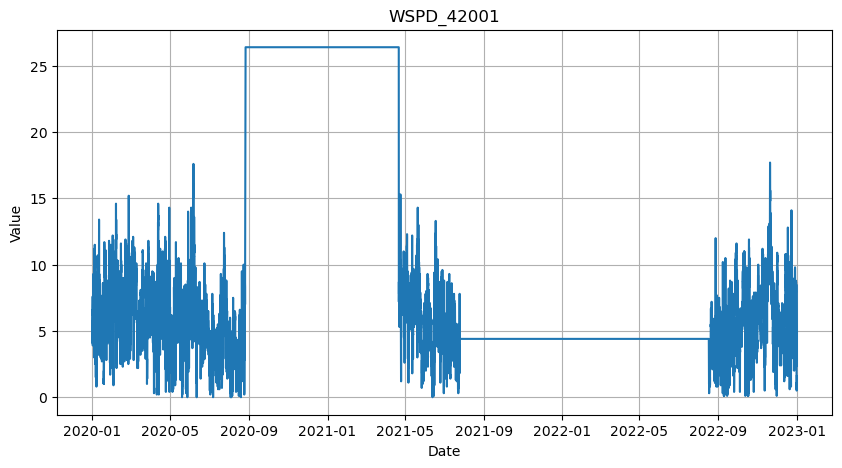

In [118]:
display_station_data(data, "42001")


RadioButtons(description='Column:', options=('WSPD_42002', 'PRES_42002', 'ATMP_42002', 'WTMP_42002', 'DEWP_420…

Output()

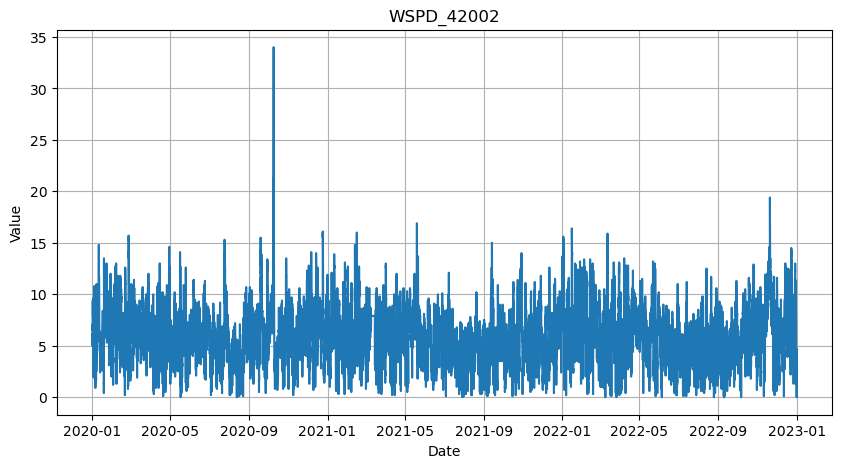

In [119]:
display_station_data(data, "42002")

RadioButtons(description='Column:', options=('WSPD_42003', 'PRES_42003', 'ATMP_42003', 'WTMP_42003', 'DEWP_420…

Output()

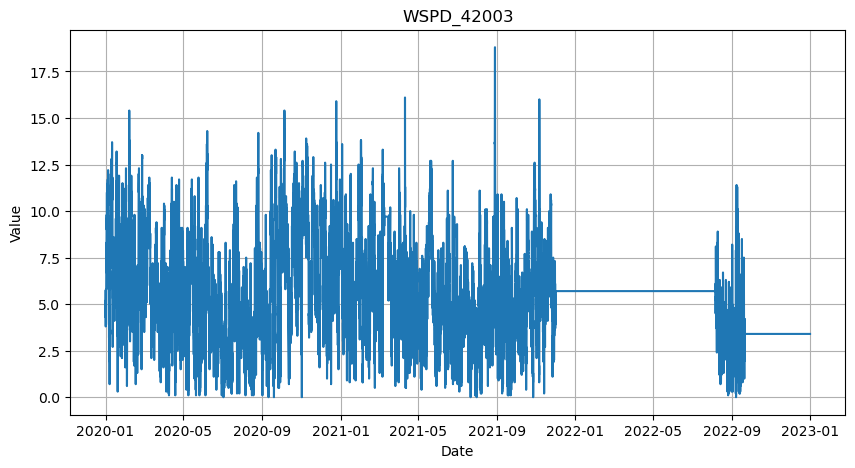

In [120]:
display_station_data(data, "42003")

In [121]:
display_station_data(data, "42012")

RadioButtons(description='Column:', options=(), value=None)

Output()

IndexError: index 0 is out of bounds for axis 0 with size 0

RadioButtons(description='Column:', options=('WSPD_42019', 'PRES_42019', 'ATMP_42019', 'WTMP_42019', 'DEWP_420…

Output()

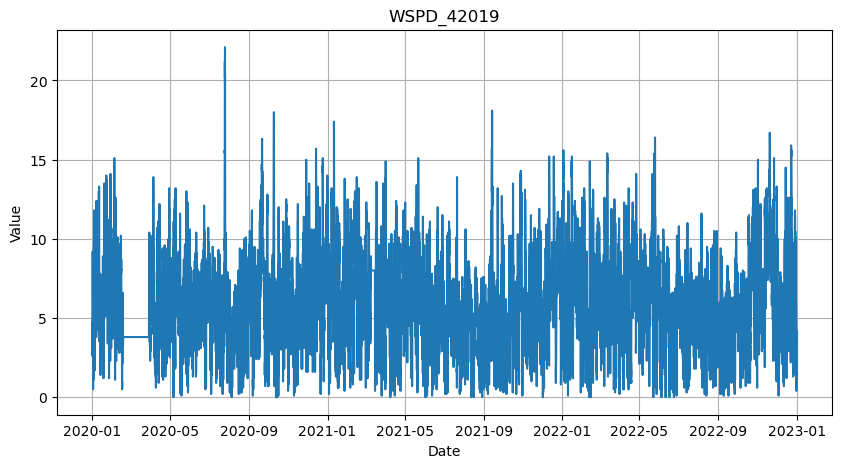

In [122]:
display_station_data(data, "42019")

RadioButtons(description='Column:', options=('WSPD_42020', 'PRES_42020', 'ATMP_42020', 'WTMP_42020', 'DEWP_420…

Output()

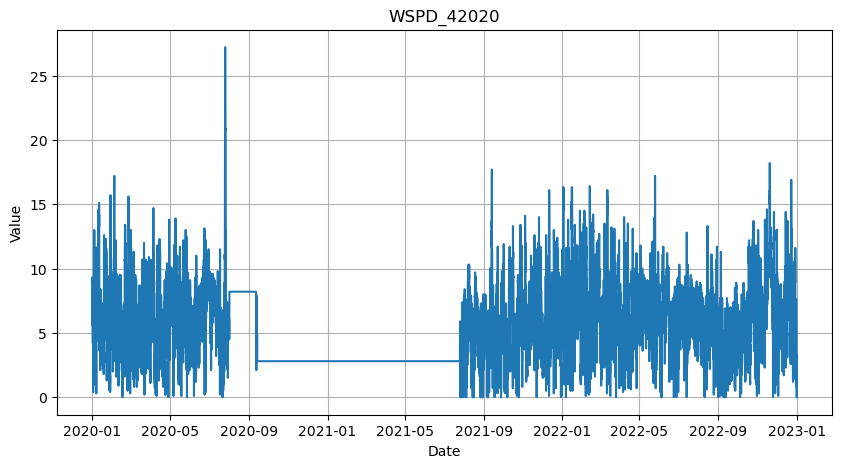

In [123]:
display_station_data(data, "42020")

RadioButtons(description='Column:', options=('WSPD_42035', 'PRES_42035', 'ATMP_42035', 'WTMP_42035', 'DEWP_420…

Output()

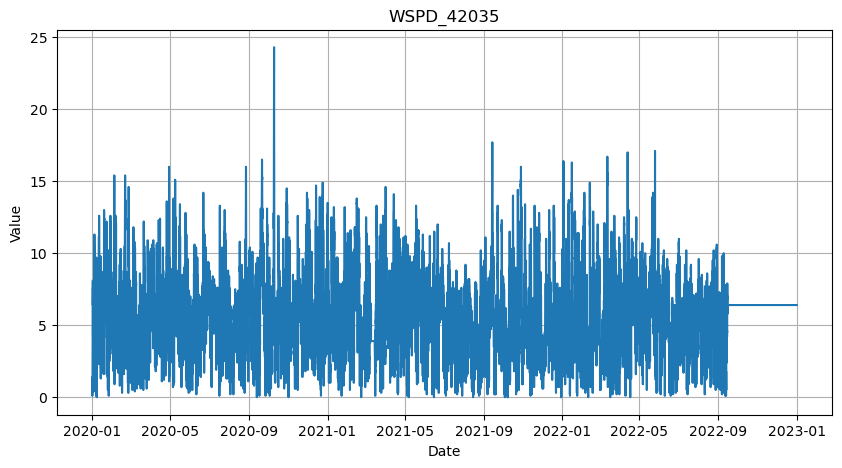

In [124]:
display_station_data(data, "42035")

RadioButtons(description='Column:', options=('WSPD_42039', 'PRES_42039', 'ATMP_42039', 'WTMP_42039'), value='W…

Output()

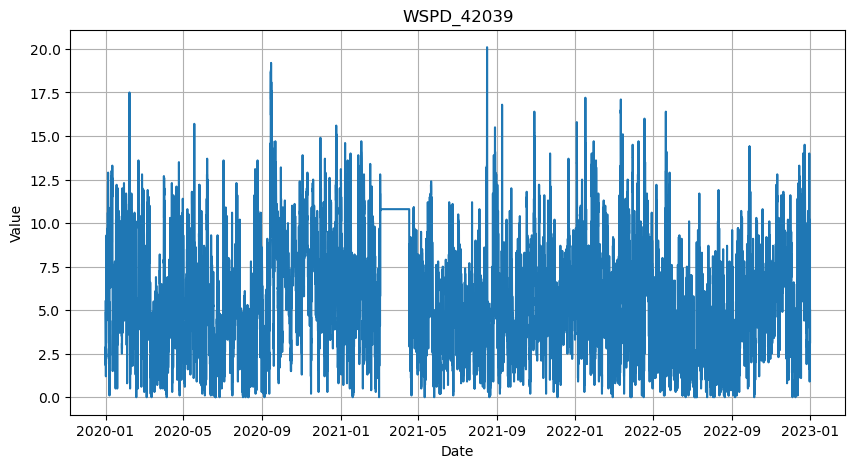

In [125]:
display_station_data(data, "42039")

RadioButtons(description='Column:', options=('WSPD_42040', 'PRES_42040', 'ATMP_42040', 'WTMP_42040', 'DEWP_420…

Output()

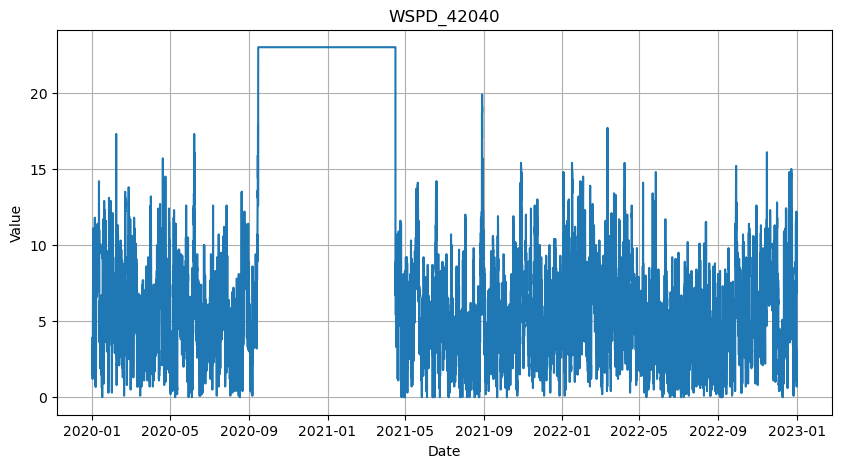

In [126]:
display_station_data(data, "42040")

In [128]:
display_station_data(data, "42055")

RadioButtons(description='Column:', options=(), value=None)

Output()

IndexError: index 0 is out of bounds for axis 0 with size 0

## Findings:

If not stated otherwise, stations cover the features: WSPD, PRES, ATMP, WTMP, DEWP (WDIR was removed!)

42001:
Some values are interpolated
last moths of 2022 has data

42002:
data available since end of 2019

42003:
Most data available but last few months of 2022 are interpolated
### NO TEST DATA

42012:
No data available (Was probably removed due to many null values)

42019:
Data from end of 2018
then small gaps in 2019 and 2020

42020:
data since 2018
No interpolation since end of 2021

42035:
No data before end of 2019
No data for last months of 2023
### NO TEST DATA

42039:
No data before mid 2019
Then only one small gap in 2021
WTMP is interpolated for last months of 2022
### Feature DEWP missed

42040:
big gap end of 2020 and beginning of 2021

42055:
No data available (Was probably removed due to many null values)

